In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_excel("breast-cancer-wisconsin.xlsx")
df.head()

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [3]:
# find out if there is any missing value
df.isnull().values.any()

True

In [4]:
# Find out the total number of missing values in each column
df.isnull().sum()

code            0
thickness       0
uniCelS         0
uniCelShape     0
marAdh          0
epiCelSize      0
bareNuc        16
blaChroma       0
normNuc         0
mitoses         0
class           0
dtype: int64

In [5]:
Avg_bareNuc = df["bareNuc"].mean()
med_bareNuc= df["bareNuc"].median()
mod_bareNuc= df["bareNuc"].value_counts().idxmax()

print("Mean is: ", Avg_bareNuc)
print("Median is: ", med_bareNuc)
print("Mode is : ", mod_bareNuc)

Mean is:  3.5446559297218156
Median is:  1.0
Mode is :  1.0


In [6]:
# replace missing values of column bareNuc with median value of the column
df["bareNuc"].fillna(df["bareNuc"].median(), inplace=True)

# Check if there is still any missing value
df["bareNuc"].isnull().sum()

0

In [7]:
# We used the median value, because it only slightly underestimates the variance in our data.
# The mean will underestimate the variance in our data much more

In [8]:
# 2b
# find out which number signifies the classes of cancer
df["class"].value_counts()

2    458
4    241
Name: class, dtype: int64

In [9]:
# Replace the number the number 2 with benign and the number 4 with malignant
df["class"].replace(2, "benign", inplace= True)
df["class"].replace(4, "malignant", inplace= True)
df["class"].value_counts()
df.head()

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [15]:
# create a dataFrame containing only the class column
classes=df["class"]


In [10]:
# create a dataFrame containing only the relevance features
Rel_features =df.drop(["code","class"],axis=1)

In [11]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
p_Components = pca.fit_transform(Rel_features)
principalDf = pd.DataFrame(data = p_Components
             , columns = ['principal component 1', 'principal component 2'])

In [20]:
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)

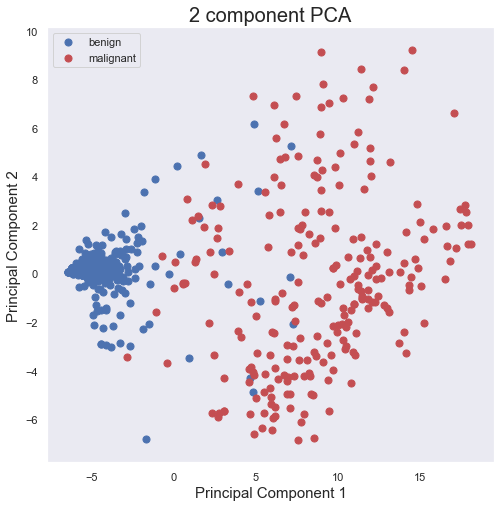

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['benign', 'malignant']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [23]:
pca.explained_variance_ratio_.sum()*100

76.23831402133546

In [ ]:
# With two components we have 76% of the variance

In [24]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(Rel_features)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5'])

In [25]:
pca.explained_variance_ratio_.sum()*100

90.60584042484665

In [26]:
# We need 5 components to cover greater than or equal to 90% of the variance

In [81]:
# 2c

In [27]:
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

,PC1,PC2,PC3,PC4,PC5,class
0,-4.418342,0.032549,-1.732736,0.109784,-0.834715,benign
1,4.861916,-4.869842,1.035612,0.642934,1.061164,benign
2,-4.575277,-0.629610,0.049151,-0.328038,0.149807,benign
3,5.165415,3.406013,-2.184542,-1.631945,3.283522,benign
4,-4.053561,-0.105016,0.081709,0.841327,-1.694524,benign


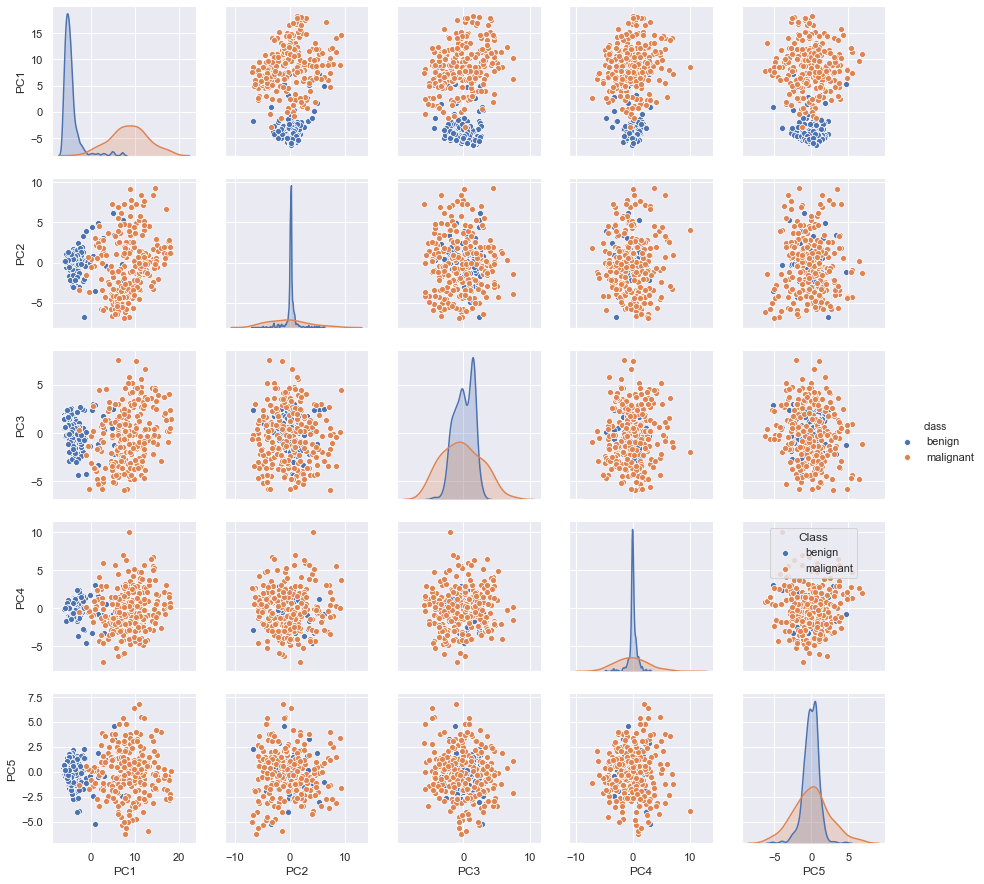

In [28]:
ax = sns.pairplot(finalDf, hue="class",hue_order=("benign","malignant"), height = 2.5)

ax=plt.legend(title='Class', loc="upper center", labels=['benign', 'malignant']);

In [76]:
# 2d


In [77]:
# PC1
# Malignant has the highest weight and Benign the lowest weight

In [ ]:
# 2f
'''
In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less 
than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of 
maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of 
one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.
'''

# Yes, PCA is effected by scale so you need to scale the features in your data before applying PCA.
# Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) 

# Standardizing the features
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(Rel_features)